# **Multiple Linear Regression**

# 🔹Step1 : Importing necessary libraries

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 🔹Step2: Load Dataset

In [12]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [19]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [33]:
# Convert to a Pandas DataFrame
df = pd.DataFrame(data.data , columns = data.feature_names)

In [41]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# 🔹 Step 3: Exploratory Data Analysis (EDA)

In [52]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


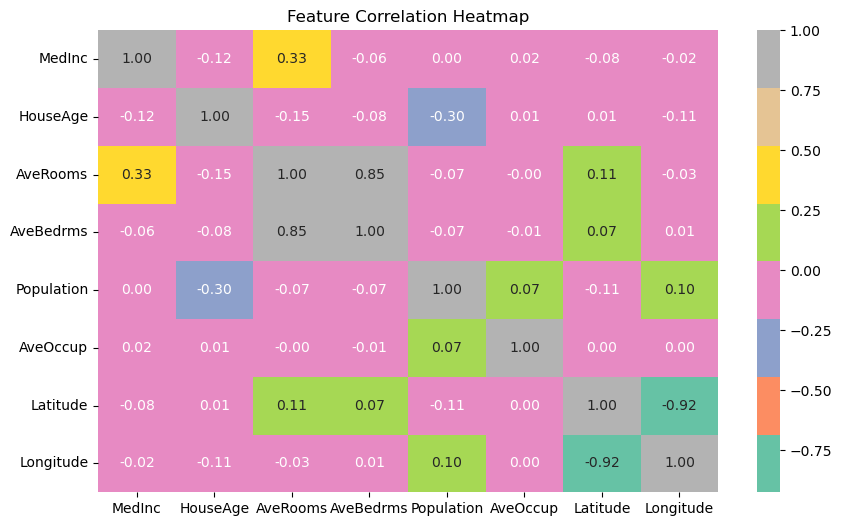

In [60]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Set2', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 🔹 Step 4: Separate Independent & Dependent Variables Using .iloc

In [63]:
# Independent variables (X) - All rows, all columns except last one
X = df.iloc[:, :-1]

# Dependent variable (y) - All rows, only the last column
y = df.iloc[:, -1]

In [69]:
# Display first few rows of X and y
print(X.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85


In [71]:
print(y.head())

0   -122.23
1   -122.22
2   -122.24
3   -122.25
4   -122.25
Name: Longitude, dtype: float64


# 🔹 Step 5: Split Data for Model Training

In [74]:
# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78
...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58


In [80]:
# Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Step 5: Train Multiple Linear Regression Model

In [88]:
# Initialize
model = LinearRegression()
model

LinearRegression()

In [92]:
# Train the model
model.fit(X_train_scaled , y_train)

LinearRegression()

# 🔹 Step 7 : Make Predictions 

In [98]:
# Predict on test data
y_pred = model.predict(X_test_scaled)
y_pred

array([-119.64996293, -119.02610127, -122.16381508, ..., -121.6613233 ,
       -120.44277427, -118.30580105])

# 🔹 Step 8: Visualizing Predictions vs Actual Values

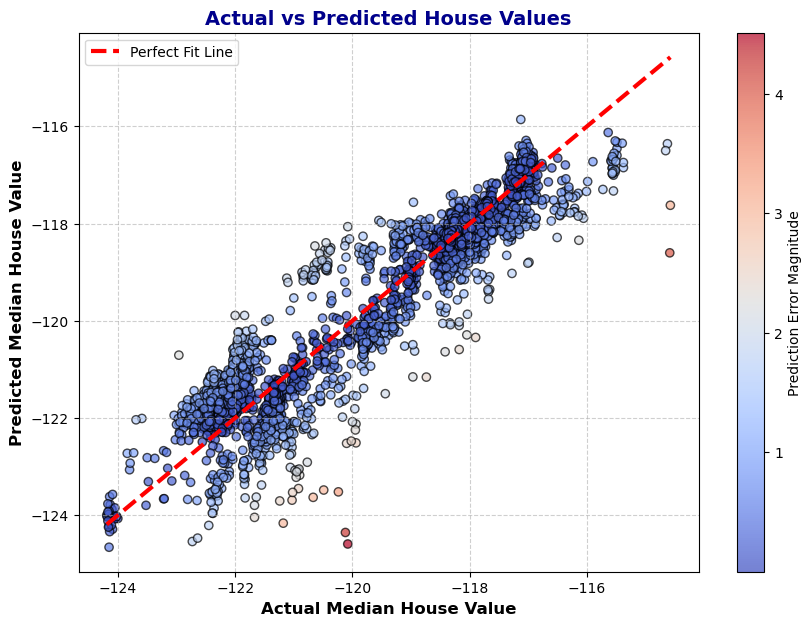

In [105]:
plt.figure(figsize=(10, 7))

# Use a colormap for scatter points based on error magnitude
colors = np.abs(y_test - y_pred)  # Difference between actual and predicted values
scatter = plt.scatter(y_test, y_pred, c=colors, cmap='coolwarm', alpha=0.7, edgecolors='k')

# Add colorbar
plt.colorbar(scatter, label="Prediction Error Magnitude")

# Plot perfect fit line (diagonal line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3, linestyle="--", label="Perfect Fit Line")

# Labels and title
plt.xlabel("Actual Median House Value", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Median House Value", fontsize=12, fontweight='bold')
plt.title("Actual vs Predicted House Values", fontsize=14, fontweight='bold', color='darkblue')

# Customize grid and legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


# 🔹Step 9: Evaluate the Model

In [109]:

# Calculate Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.4270
R² Score: 0.8926
